In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Chi-squared statistic: 4286.2712
Degrees of freedom: 2399
P-value: 0.0000
Chi-squared statistic: 4286.2712
Degrees of freedom: 2399
P-value: 0.0000
Chi-squared statistic: 2491.5879
Degrees of freedom: 2399
P-value: 0.0919
Chi-squared statistic: 2491.5879
Degrees of freedom: 2399
P-value: 0.0919
Chi-squared statistic: 2312.0491
Degrees of freedom: 2399
P-value: 0.8964
Chi-squared statistic: 2312.0491
Degrees of freedom: 2399
P-value: 0.8964
Chi-squared statistic: 2322.2080
Degrees of freedom: 2399
P-value: 0.8667
Chi-squared statistic: 2322.2080
Degrees of freedom: 2399
P-value: 0.8667
Chi-squared statistic: 2340.2993
Degrees of freedom: 2399
P-value: 0.8009
Chi-squared statistic: 2340.2993
Degrees of freedom: 2399
P-value: 0.8009
Chi-squared statistic: 2362.7404
Degrees of freedom: 2399
P-value: 0.6972
Chi-squared statistic: 2362.7404
Degrees of freedom: 2399
P-value: 0.6972
Chi-squared statistic: 2410.1951
Degrees of freedom: 2399
P-value: 0.4321
Chi-squared statistic: 2410.1951
Degre

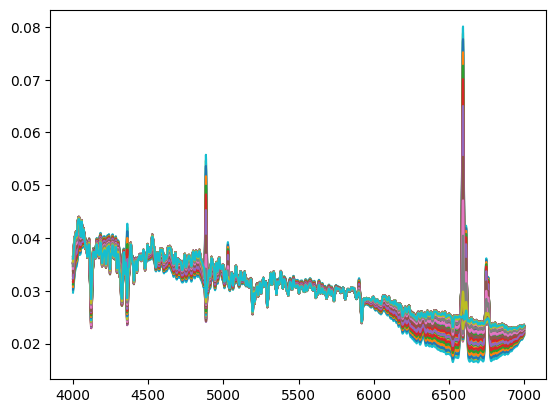

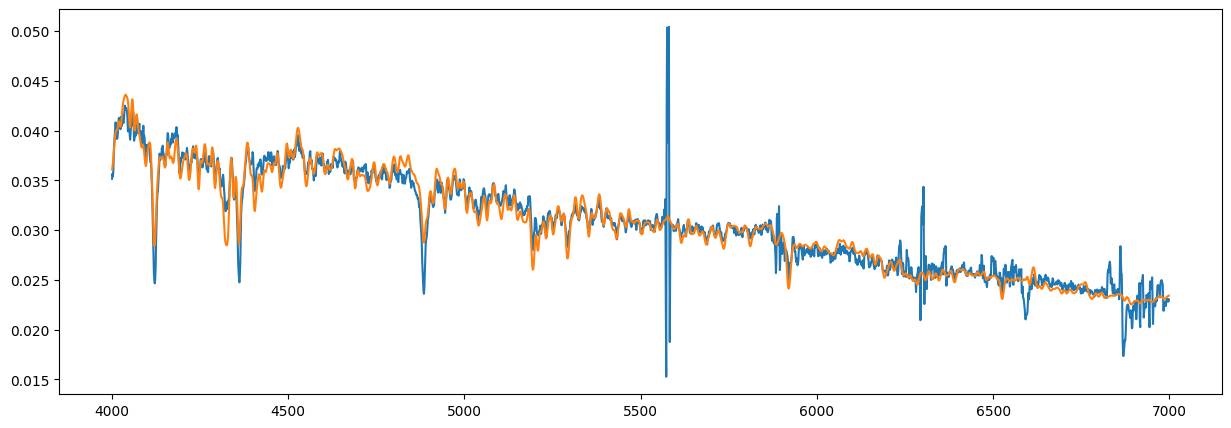

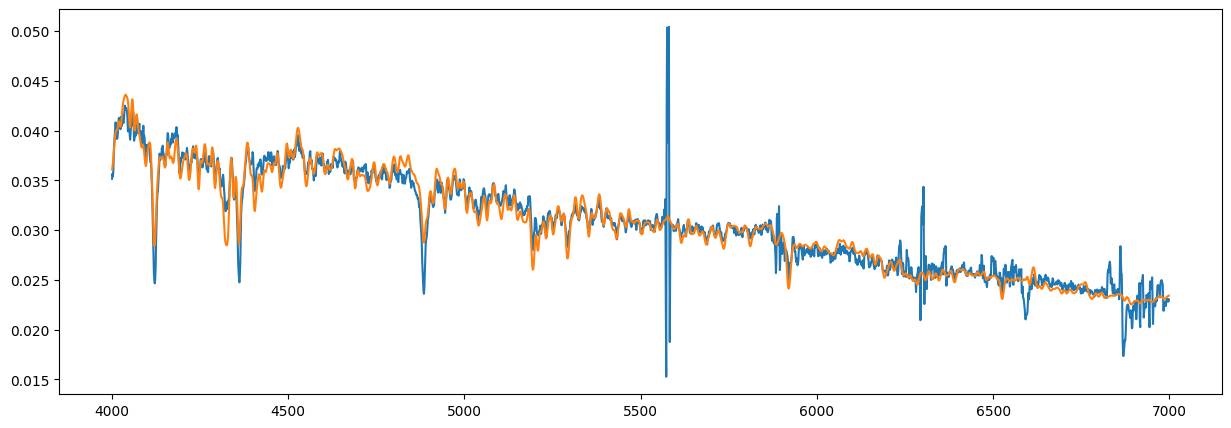

In [2]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np # Import numpy for float64
import scipy.stats


#open the file
spec = fits.open('/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits')
specflx = spec[0].data
specerr = spec[1].data
specwav = spec[2].data

#plot the spectrum 0
def goodness_of_fit(data_observed, data_model, data_error=None, statistic='chi2'):
    """Calculates goodness of fit using specified statistic.

    Args:
        data_observed (np.ndarray): The observed data.
        data_model (np.ndarray): The model data.
        data_error (np.ndarray, optional): The errors associated with observed data.
                                          Required for 'chi2' statistic. Defaults to None.
        statistic (str, optional): The statistical test to use. Can be 'chi2' or 'ad'.
                                   Defaults to 'chi2'.

    Returns:
        float or tuple: The goodness of fit statistic(s).

    Raises:
        ValueError: If an unsupported statistic is requested or required data is missing.
    """
    if len(data_observed) != len(data_model):
        raise ValueError("Observed and model data must have the same length.")

    if statistic == 'chi2':
        if data_error is None:
            raise ValueError("Error data (data_error) is required for 'chi2' statistic.")
        if len(data_observed) != len(data_error):
            raise ValueError("Observed data and error data must have the same length.")

        # Avoid division by zero for error, replace 0 with a small number or handle appropriately
        # Here, we'll replace 0 errors with NaN so they are ignored in sum (or you can set to infinity)
        # A better approach might be to filter out points with 0 error
        non_zero_errors_mask = data_error != 0
        if not np.any(non_zero_errors_mask):
            print("Warning: All error values are zero. Chi-squared test cannot be performed meaningfully.")
            return np.nan

        # Filter data where error is non-zero
        filtered_observed = data_observed[non_zero_errors_mask]
        filtered_model = data_model[non_zero_errors_mask]
        filtered_error = data_error[non_zero_errors_mask]

        chi2 = np.sum(((filtered_observed - filtered_model) / filtered_error)**2)
        degrees_of_freedom = len(filtered_observed) - 1 # Assuming one parameter is implicitly fit (e.g., scaling)
        print(f"Chi-squared statistic: {chi2:.4f}")
        print(f"Degrees of freedom: {degrees_of_freedom}")
        # scipy.stats.chi2.sf is the survival function (1 - CDF), which gives the p-value
        p_value = scipy.stats.chi2.sf(chi2, degrees_of_freedom)
        print(f"P-value: {p_value:.4f}")
        return chi2

    elif statistic == 'ad':
        # anderson_ksamp expects a sequence of arrays
        # It returns (statistic, critical_values, significance_level)
        result = scipy.stats.anderson_ksamp([data_observed, data_model])
        print(f"Anderson-Darling Test Statistic: {result[0]:.4f}")
        print(f"Critical Values: {result[1]}")
        print(f"Significance Level: {result[2]}")
        return result
    else:
        raise ValueError(f"Unsupported statistic: {statistic}")
#Read model
modhdu = fits.open('/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits')
#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data
index=0
temp = 0
for ext in np.arange(1,Next+1):
  thisext = modhdu[ext]
  thishead = thisext.header
  modspec = thisext.data[0]
  Qtau = thishead['TRUNCTAU']
  Qage = thishead['TRUNCAGE']
  photarr = np.array((thishead['MODFUV'],thishead['MODNUV'],\
  thishead['MODU'],thishead['MODG'],\
  thishead['MODI'],thishead['MODZ'], \
  thishead['MODIR1'],thishead['MODIR4']))
  goodness_of_fit(specflx, modspec*10**20, data_error=specerr, statistic='chi2')
  if ext==0:
    print("First value")
    temp = chi2=goodness_of_fit(specflx, modspec*10**20, data_error=specerr, statistic='chi2')
  else:
    temp2 = chi2=goodness_of_fit(specflx, modspec*10**20, data_error=specerr, statistic='chi2')
    if temp<temp2:
      temp=temp
      index=ext
    else:
      temp=temp2

  plt.plot(specwav, modhdu[index].data[0]*10**20)
  #plt.plot(specwav,modspec*10**20)
plt.figure(figsize=(15, 5))
plt.plot(specwav,specflx)
plt.plot(specwav, modhdu[index].data[0]*10**20)
print(temp)
print(index)
plt.figure(figsize=(15, 5))
plt.plot(specwav,specflx)
plt.plot(specwav, modhdu[index].data[0]*10**20)
# Define the goodness_of_fit function to resolve NameError


# Call the goodness_of_fit function with the 'chi2' statistic


In [3]:
file_path1 = '/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits'
file_path2 = '/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits'
#open the file
qsolist=fits.open(file_path1)

print("Available HDUs:")
for i, hdu in enumerate(qsolist):
    print(f"HDU {i}: {hdu.name} ({hdu.__class__.__name__})")

# Let's inspect the first data HDU (assuming it's at index 1 for typical FITS files)
if len(qsolist) > 1 and isinstance(qsolist[1], fits.BinTableHDU):
    print("\n--- Header of the first data HDU (HDU 1) ---")
    print(repr(qsolist[1].header))
    print("\n--- Column names in the first data HDU (HDU 1) ---")
    if qsolist[1].columns:
        print(qsolist[1].columns.names)
    else:
        print("No columns found in this HDU.")
elif len(qsolist) > 0:
    print("\n--- Header of the primary HDU (HDU 0) ---")
    print(repr(qsolist[0].header))
    print("\n--- No data columns to display for the primary HDU or non-BinTableHDU ---")
else:
    print("\nNo HDUs found in the FITS file.")

qsolist.close()
############################################################
qsolist=fits.open(file_path2)

print("Available HDUs:")
for i, hdu in enumerate(qsolist):
    print(f"HDU {i}: {hdu.name} ({hdu.__class__.__name__})")

# Let's inspect the first data HDU (assuming it's at index 1 for typical FITS files)
if len(qsolist) > 1 and isinstance(qsolist[1], fits.BinTableHDU):
    print("\n--- Header of the first data HDU (HDU 1) ---")
    print(repr(qsolist[1].header))
    print("\n--- Column names in the first data HDU (HDU 1) ---")
    if qsolist[1].columns:
        print(qsolist[1].columns.names)
    else:
        print("No columns found in this HDU.")
elif len(qsolist) > 0:
    print("\n--- Header of the primary HDU (HDU 0) ---")
    print(repr(qsolist[0].header))
    print("\n--- No data columns to display for the primary HDU or non-BinTableHDU ---")
else:
    print("\nNo HDUs found in the FITS file.")

qsolist.close()

Available HDUs:
HDU 0: PRIMARY (PrimaryHDU)
HDU 1:  (ImageHDU)
HDU 2:  (ImageHDU)

--- Header of the primary HDU (HDU 0) ---
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 2400                                                  
EXTEND  =                    T                                                  
CRVAL1  =               4000.0                                                  
CD1_1   =                 1.25                                                  

--- No data columns to display for the primary HDU or non-BinTableHDU ---
Available HDUs:
HDU 0: PRIMARY (PrimaryHDU)
HDU 1:  (ImageHDU)
HDU 2:  (ImageHDU)
HDU 3:  (ImageHDU)
HDU 4:  (ImageHDU)
HDU 5:  (ImageHDU)
HDU 6:  (ImageHDU)
HDU 7:  (ImageHDU)
HDU 8:  (ImageHDU)
HDU 9:  (ImageHDU)
HDU 10:  (ImageHDU

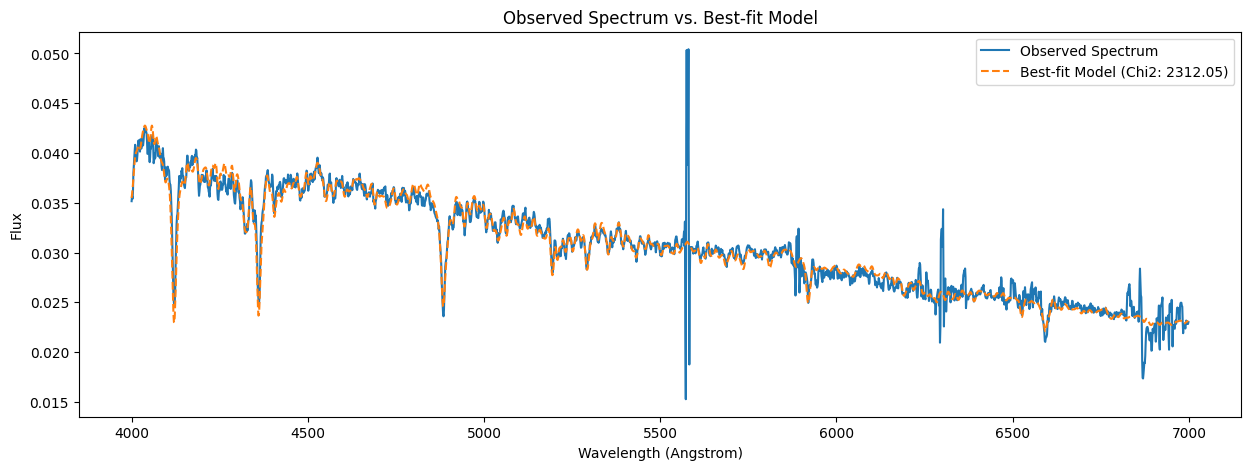

Minimum Chi-squared value: 2312.0491
Index of best-fit model: 3
Chi-squared results DataFrame:
   Qtau  Qage      chi2
0    20    50  8.363172
1    20    75  7.820675
2    20   100  7.745889
3    20   125  7.750274
4    20   150  7.758034


In [4]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np # Import numpy for float64
import scipy.stats

#open the file
spec = fits.open('/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits')
specflx = spec[0].data
specerr = spec[1].data
specwav = spec[2].data

#plot the spectrum 0
def goodness_of_fit(data_observed, data_model, data_error=None, statistic='chi2'):
    """Calculates goodness of fit using specified statistic.

    Args:
        data_observed (np.ndarray): The observed data.
        data_model (np.ndarray): The model data.
        data_error (np.ndarray, optional): The errors associated with observed data.
                                          Required for 'chi2' statistic. Defaults to None.
        statistic (str, optional): The statistical test to use. Can be 'chi2' or 'ad'.
                                   Defaults to 'chi2'.

    Returns:
        float or tuple: The goodness of fit statistic(s).

    Raises:
        ValueError: If an unsupported statistic is requested or required data is missing.
    """
    if len(data_observed) != len(data_model):
        raise ValueError("Observed and model data must have the same length.")

    if statistic == 'chi2':
        if data_error is None:
            raise ValueError("Error data (data_error) is required for 'chi2' statistic.")
        if len(data_observed) != len(data_error):
            raise ValueError("Observed data and error data must have the same length.")

        non_zero_errors_mask = data_error != 0
        if not np.any(non_zero_errors_mask):
            print("Warning: All error values are zero. Chi-squared test cannot be performed meaningfully.")
            return np.nan

        filtered_observed = data_observed[non_zero_errors_mask]
        filtered_model = data_model[non_zero_errors_mask]
        filtered_error = data_error[non_zero_errors_mask]

        chi2 = np.sum(((filtered_observed - filtered_model) / filtered_error)**2)
        degrees_of_freedom = len(filtered_observed) - 1 # Assuming one parameter is implicitly fit (e.g., scaling)
        # print(f"Chi-squared statistic: {chi2:.4f}")
        # print(f"Degrees of freedom: {degrees_of_freedom}")
        # p_value = scipy.stats.chi2.sf(chi2, degrees_of_freedom)
        # print(f"P-value: {p_value:.4f}")
        return chi2

    elif statistic == 'ad':
        result = scipy.stats.anderson_ksamp([data_observed, data_model])
        # print(f"Anderson-Darling Test Statistic: {result[0]:.4f}")
        # print(f"Critical Values: {result[1]}")
        # print(f"Significance Level: {result[2]}")
        return result
    else:
        raise ValueError(f"Unsupported statistic: {statistic}")

#Read model
modhdu = fits.open('/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits')

#How many extensions
Next = modhdu[0].header['NEXT']
modwave = modhdu[0].data

chi2_results_list = []
min_chi2 = np.inf
best_fit_index = -1

for ext_idx in np.arange(1, Next + 1):
    thisext = modhdu[ext_idx]
    thishead = thisext.header
    modspec = thisext.data[0]
    Qtau = thishead['TRUNCTAU']
    Qage = thishead['TRUNCAGE']

    # Calculate Chi-squared value
    chi2_value = goodness_of_fit(specflx, modspec * 10**20, data_error=specerr, statistic='chi2')

    # Append results to the list
    chi2_results_list.append({'Qtau': Qtau, 'Qage': Qage, 'chi2': np.log(chi2_value)})

    # Update best-fit model logic
    if chi2_value < min_chi2:
        min_chi2 = chi2_value
        best_fit_index = ext_idx

# Create a pandas DataFrame from the results list
df_chi2_results = pd.DataFrame(chi2_results_list)
log_df_chi2_results = np.log(pd.DataFrame(chi2_results_list))
# Plot the best-fit spectrum along with the observed spectrum
plt.figure(figsize=(15, 5))
plt.plot(specwav, specflx, label='Observed Spectrum')
plt.plot(specwav, modhdu[best_fit_index].data[0] * 10**20, label=f'Best-fit Model (Chi2: {min_chi2:.2f})', linestyle='--')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.title('Observed Spectrum vs. Best-fit Model')
plt.legend()
plt.show()

print(f"Minimum Chi-squared value: {min_chi2:.4f}")
print(f"Index of best-fit model: {best_fit_index}")
print("Chi-squared results DataFrame:")
print(df_chi2_results.head())

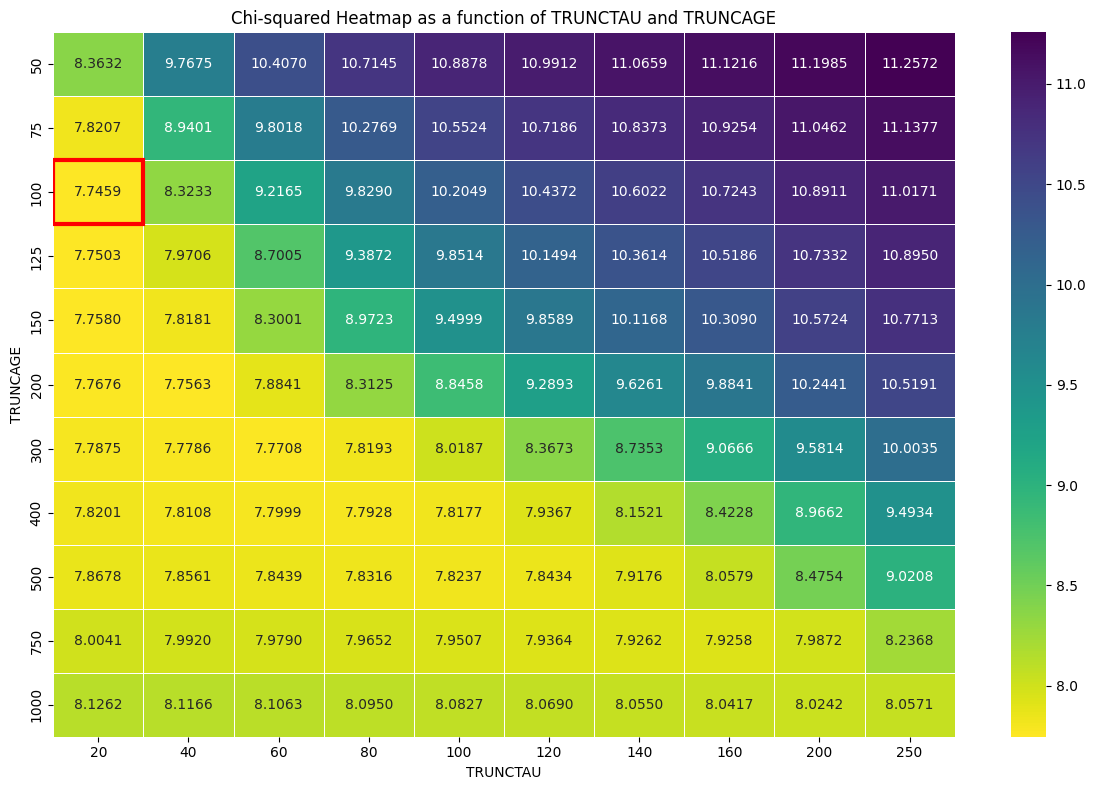

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np # Ensure numpy is imported

# Pivot the DataFrame to get Chi-squared values as a matrix
# Qtau will be on the x-axis, Qage on the y-axis, and chi2 as values
heatmap_data = df_chi2_results.pivot(index='Qage', columns='Qtau', values='chi2')

# Find the minimum chi2 value and its corresponding Qtau and Qage
min_chi2_row = df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]
min_Qtau = min_chi2_row['Qtau']
min_Qage = min_chi2_row['Qage']

# Create the heatmap with 'viridis_r' colormap and float annotations
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap='viridis_r', annot=True, fmt='.4f', linewidths=.5)
plt.title('Chi-squared Heatmap as a function of TRUNCTAU and TRUNCAGE')
plt.xlabel('TRUNCTAU')
plt.ylabel('TRUNCAGE')

# Highlight the cell with the minimum chi2 value
# Get the position of the minimum value in the heatmap grid
min_row_idx = heatmap_data.index.get_loc(min_Qage)
min_col_idx = heatmap_data.columns.get_loc(min_Qtau)

# Add a red rectangle patch around the cell
ax.add_patch(Rectangle((min_col_idx, min_row_idx), 1, 1, fill=False, edgecolor='red', lw=3))

plt.tight_layout()
plt.show()

In [6]:
regions = ['region1', 'region2', 'region3', 'region11', 'region12', 'region13']

for region in regions:
    spec_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_{region}.fits'
    models_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_{region}.fits'
    print(f'Processing region: {region}')
    print(f'  Spectrum file path: {spec_file_path}')
    print(f'  Models file path: {models_file_path}')

Processing region: region1
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region1.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region1.fits
Processing region: region2
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits
Processing region: region3
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region3.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region3.fits
Processing region: region11
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region11.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region11.fits
Processing region: region12
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region12.fits
  Models file 

In [7]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy for float64
import scipy.stats

# Define the goodness_of_fit function here as it's a utility for the task
def goodness_of_fit(data_observed, data_model, data_error=None, statistic='chi2'):
    """Calculates goodness of fit using specified statistic.

    Args:
        data_observed (np.ndarray): The observed data.
        data_model (np.ndarray): The model data.
        data_error (np.ndarray, optional): The errors associated with observed data.
                                          Required for 'chi2' statistic. Defaults to None.
        statistic (str, optional): The statistical test to use. Can be 'chi2' or 'ad'.
                                   Defaults to 'chi2'.

    Returns:
        float or tuple: The goodness of fit statistic(s).

    Raises:
        ValueError: If an unsupported statistic is requested or required data is missing.
    """
    if len(data_observed) != len(data_model):
        raise ValueError("Observed and model data must have the same length.")

    if statistic == 'chi2':
        if data_error is None:
            raise ValueError("Error data (data_error) is required for 'chi2' statistic.")
        if len(data_observed) != len(data_error):
            raise ValueError("Observed data and error data must have the same length.")

        non_zero_errors_mask = data_error != 0
        if not np.any(non_zero_errors_mask):
            print("Warning: All error values are zero. Chi-squared test cannot be performed meaningfully.")
            return np.nan

        filtered_observed = data_observed[non_zero_errors_mask]
        filtered_model = data_model[non_zero_errors_mask]
        filtered_error = data_error[non_zero_errors_mask]

        chi2 = np.sum(((filtered_observed - filtered_model) / filtered_error)**2)
        # degrees_of_freedom = len(filtered_observed) - 1 # Assuming one parameter is implicitly fit (e.g., scaling)
        return chi2

    elif statistic == 'ad':
        result = scipy.stats.anderson_ksamp([data_observed, data_model])
        return result
    else:
        raise ValueError(f"Unsupported statistic: {statistic}")

# Define regions
regions = ['region1', 'region2', 'region3', 'region11', 'region12', 'region13']

# Dictionary to store results for all regions
all_regions_chi2_results = {}

for region in regions:
    spec_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_{region}.fits'
    models_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_{region}.fits'
    print(f'\nProcessing region: {region}')
    print(f'  Spectrum file path: {spec_file_path}')
    print(f'  Models file path: {models_file_path}')

    try:
        # 1. Open the spectrum FITS file and extract data
        with fits.open(spec_file_path) as spec_hdu:
            specflx = spec_hdu[0].data
            specerr = spec_hdu[1].data
            specwav = spec_hdu[2].data

        # 2. Open the models FITS file and determine Next
        with fits.open(models_file_path) as modhdu:
            Next = modhdu[0].header['NEXT']
            # modwave = modhdu[0].data # Not needed for chi2 calculation, but useful for plotting

            # 3. Initialize list and best-fit tracking for the current region
            chi2_results_list = []
            min_chi2 = np.inf
            best_fit_index = -1
            best_fit_model_data = None

            # 5. Loop through model extensions
            for ext_idx in np.arange(1, Next + 1):
                thisext = modhdu[ext_idx]
                thishead = thisext.header
                modspec = thisext.data[0]
                Qtau = thishead['TRUNCTAU']
                Qage = thishead['TRUNCAGE']

                # d. Calculate Chi-squared value
                chi2_value = goodness_of_fit(specflx, modspec * 10**20, data_error=specerr, statistic='chi2')

                # e. Append results to the list (using natural log for potential heatmap distribution)
                if not np.isnan(chi2_value):
                    chi2_results_list.append({'Qtau': Qtau, 'Qage': Qage, 'chi2': np.log(chi2_value)})

                    # f. Update best-fit model logic
                    if chi2_value < min_chi2:
                        min_chi2 = chi2_value
                        best_fit_index = ext_idx
                        best_fit_model_data = modspec

            # Create DataFrame for the current region
            df_chi2_results = pd.DataFrame(chi2_results_list)

            print(f"  Minimum Chi-squared value for {region}: {min_chi2:.4f}")
            print(f"  Index of best-fit model for {region}: {best_fit_index}")
            print(f"  Best-fit Qtau: {df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]['Qtau']}")
            print(f"  Best-fit Qage: {df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]['Qage']}")
            print(f"  Chi-squared results DataFrame head for {region}:\n{df_chi2_results.head()}")

            # Store the df_chi2_results for the current region
            all_regions_chi2_results[region] = {
                'df_chi2_results': df_chi2_results,
                'min_chi2': min_chi2,
                'best_fit_index': best_fit_index,
                'best_fit_model_data': best_fit_model_data, # Store best fit model data for plotting later if needed
                'specwav': specwav,
                'specflx': specflx
            }

    except FileNotFoundError:
        print(f"Error: FITS files not found for {region}. Skipping.")
    except Exception as e:
        print(f"An error occurred while processing {region}: {e}")

# After the loop, you can access the results for each region using all_regions_chi2_results
# For example, for region 'region2':
# df_region2 = all_regions_chi2_results['region2']['df_chi2_results']
# min_chi2_region2 = all_regions_chi2_results['region2']['min_chi2']

print("\nFinished processing all regions. Results stored in 'all_regions_chi2_results' dictionary.")


Processing region: region1
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region1.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region1.fits
  Minimum Chi-squared value for region1: 2972.1036
  Index of best-fit model for region1: 64
  Best-fit Qtau: 120.0
  Best-fit Qage: 500.0
  Chi-squared results DataFrame head for region1:
   Qtau  Qage      chi2
0    20    50  8.061414
1    20    75  8.008423
2    20   100  8.013414
3    20   125  8.018578
4    20   150  8.020314

Processing region: region2
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits
  Minimum Chi-squared value for region2: 2312.0491
  Index of best-fit model for region2: 3
  Best-fit Qtau: 20.0
  Best-fit Qage: 100.0
  Chi-squared results DataFrame head for region2:
   Qtau  Qage      chi2
0    20    50  8.363172


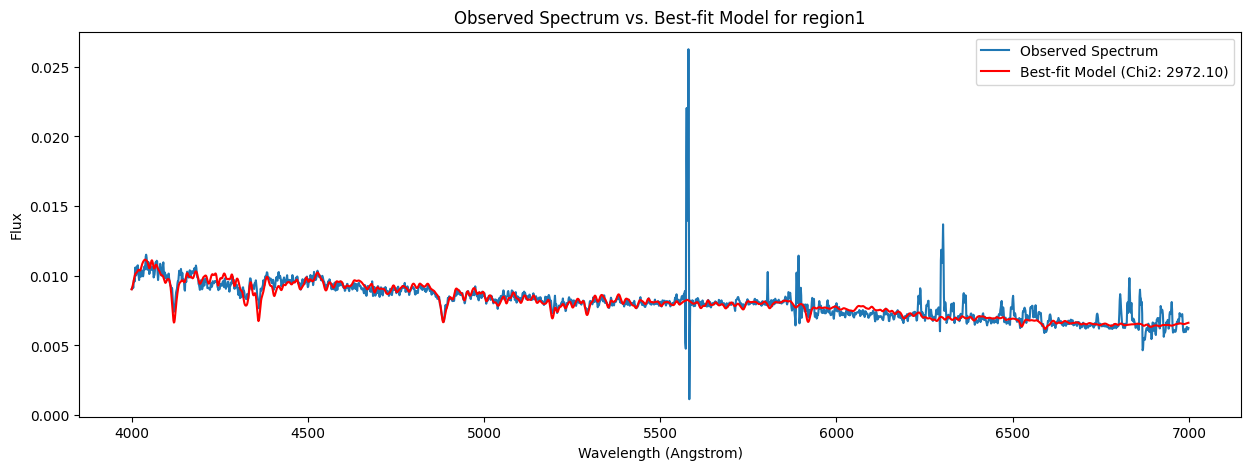

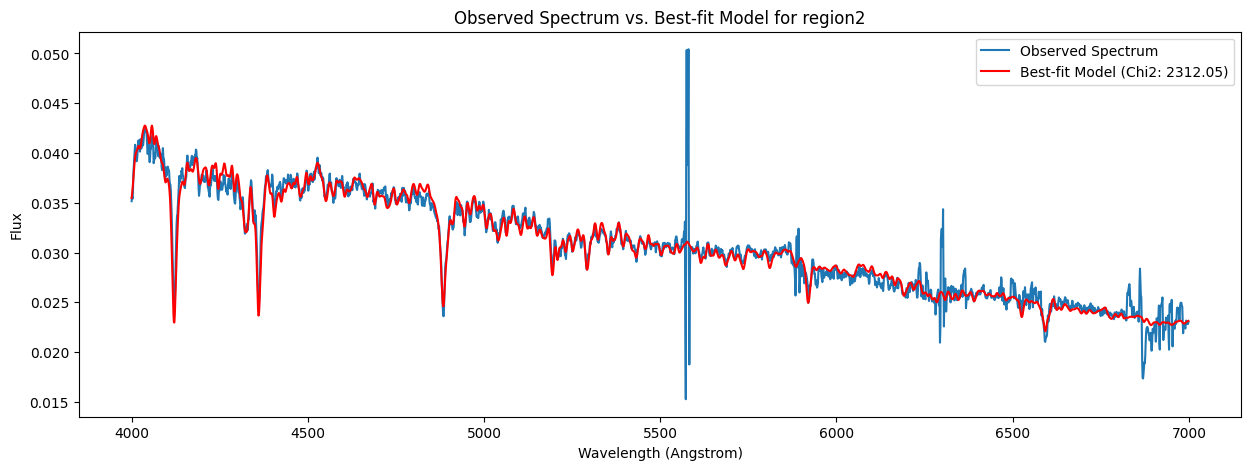

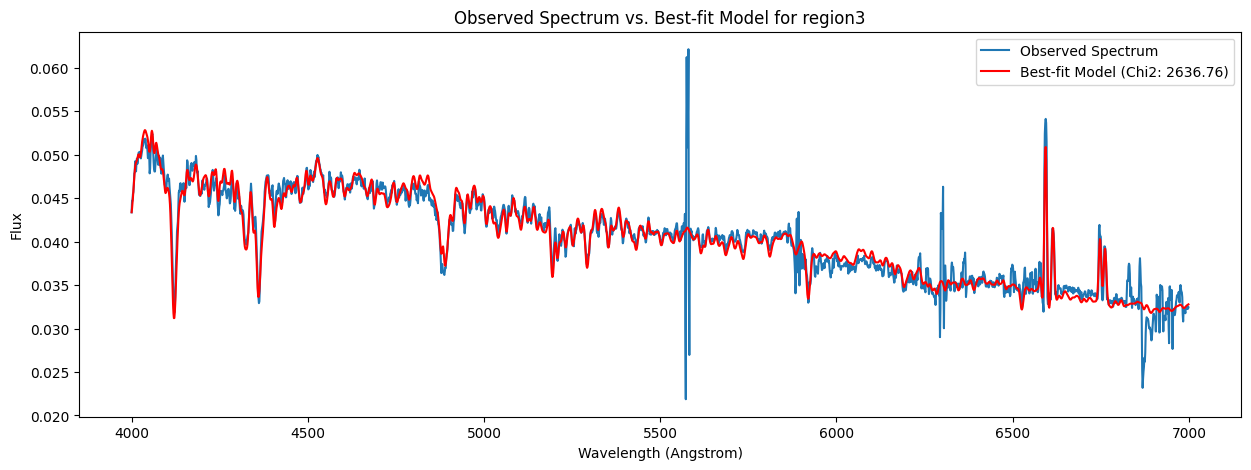

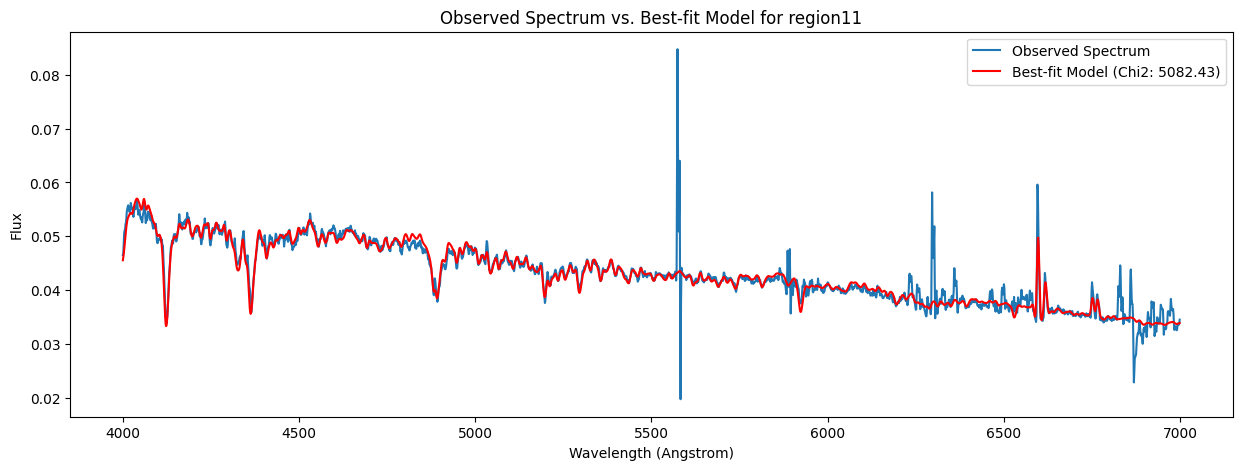

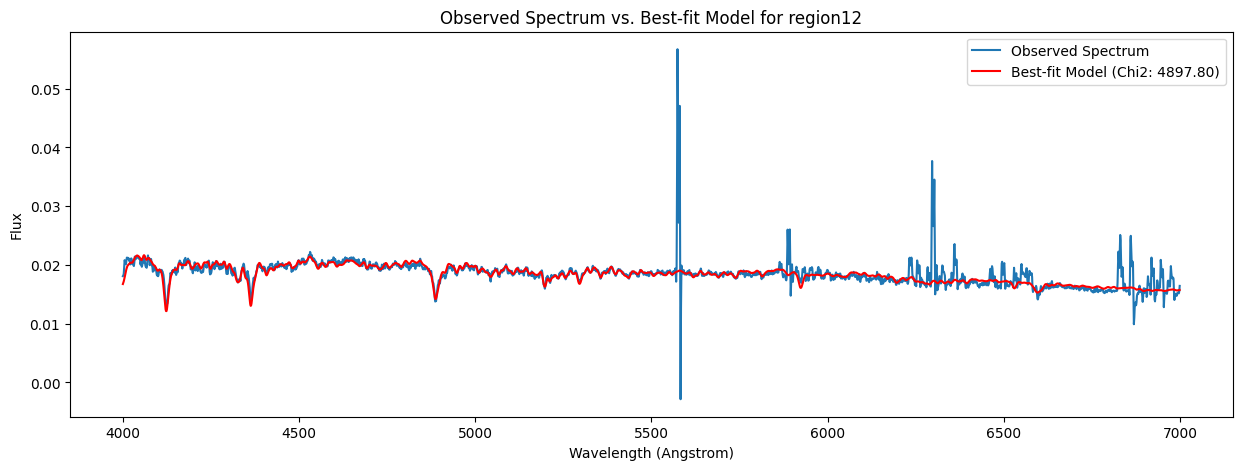

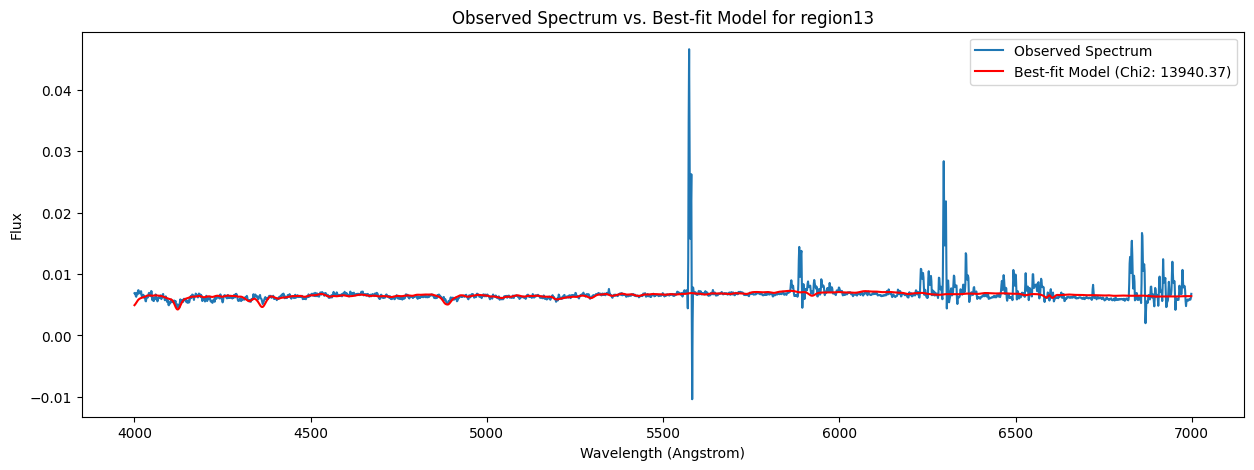

In [8]:
for region, data in all_regions_chi2_results.items():
    df_chi2_results = data['df_chi2_results']
    min_chi2 = data['min_chi2']
    best_fit_model_data = data['best_fit_model_data']
    specwav = data['specwav']
    specflx = data['specflx']

    plt.figure(figsize=(15, 5))
    plt.plot(specwav, specflx, label='Observed Spectrum')
    plt.plot(specwav, best_fit_model_data * 10**20, label=f'Best-fit Model (Chi2: {min_chi2:.2f})', linestyle='-', color ='red')
    plt.xlabel('Wavelength (Angstrom)')
    plt.ylabel('Flux')
    plt.title(f'Observed Spectrum vs. Best-fit Model for {region}')
    plt.legend()
    plt.show()

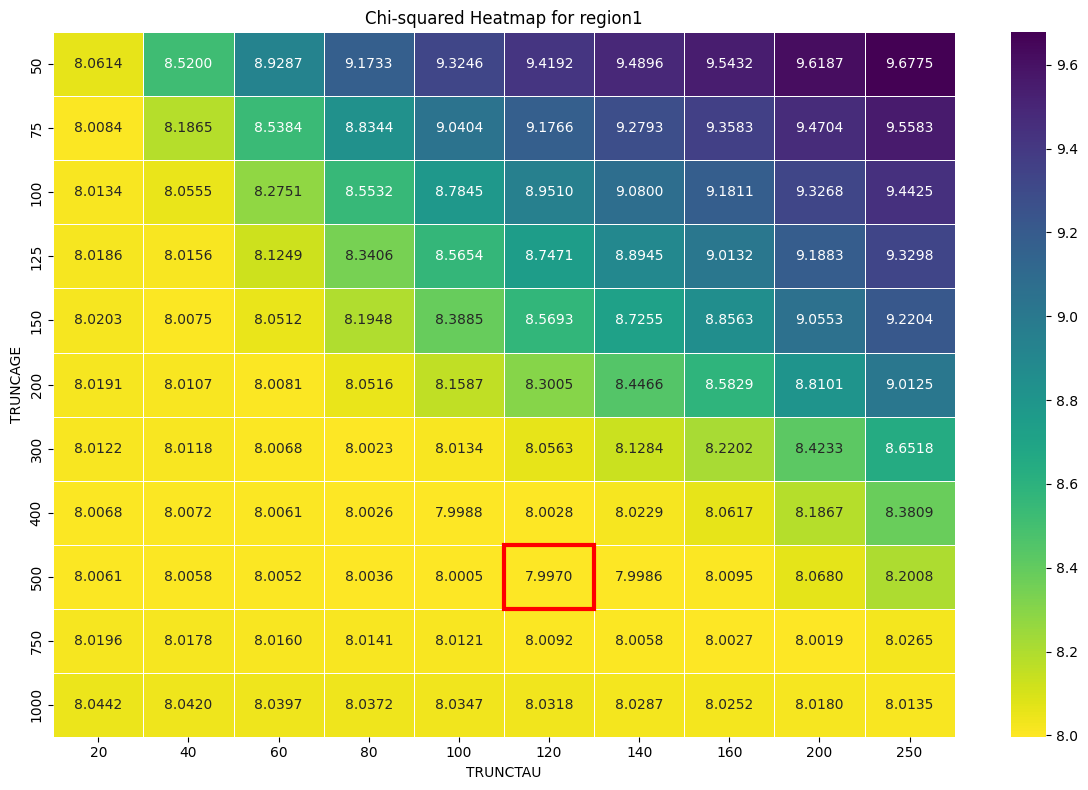

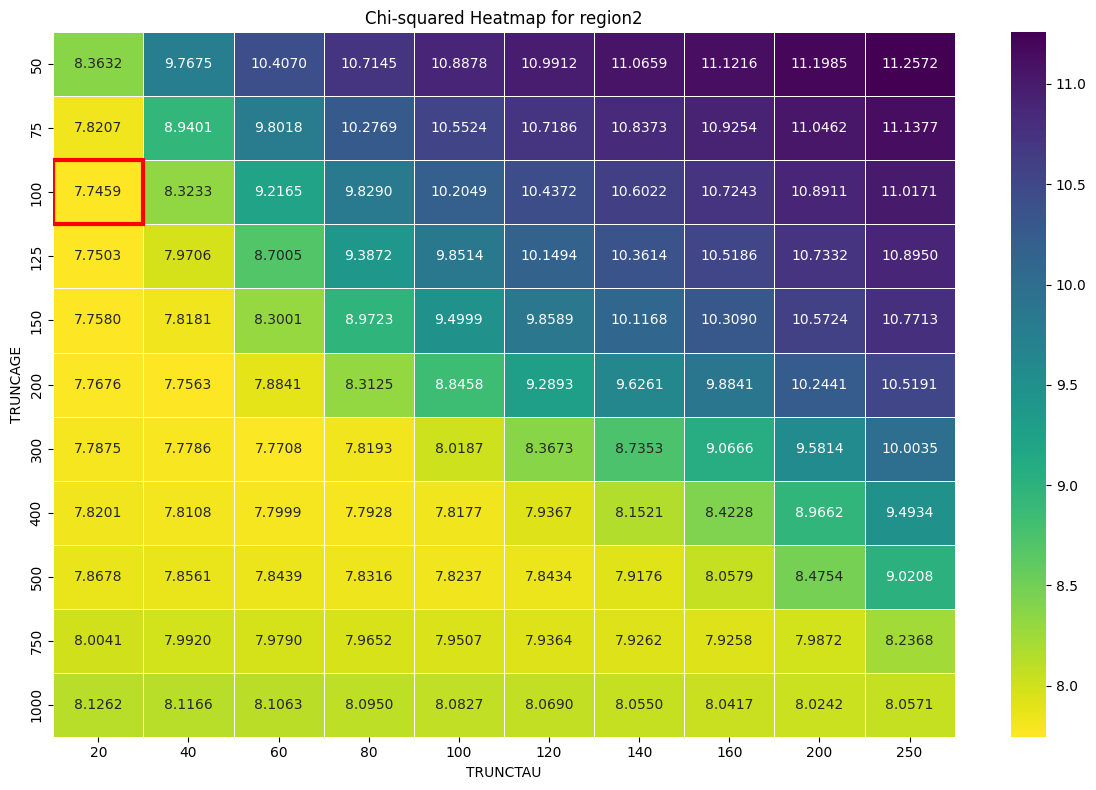

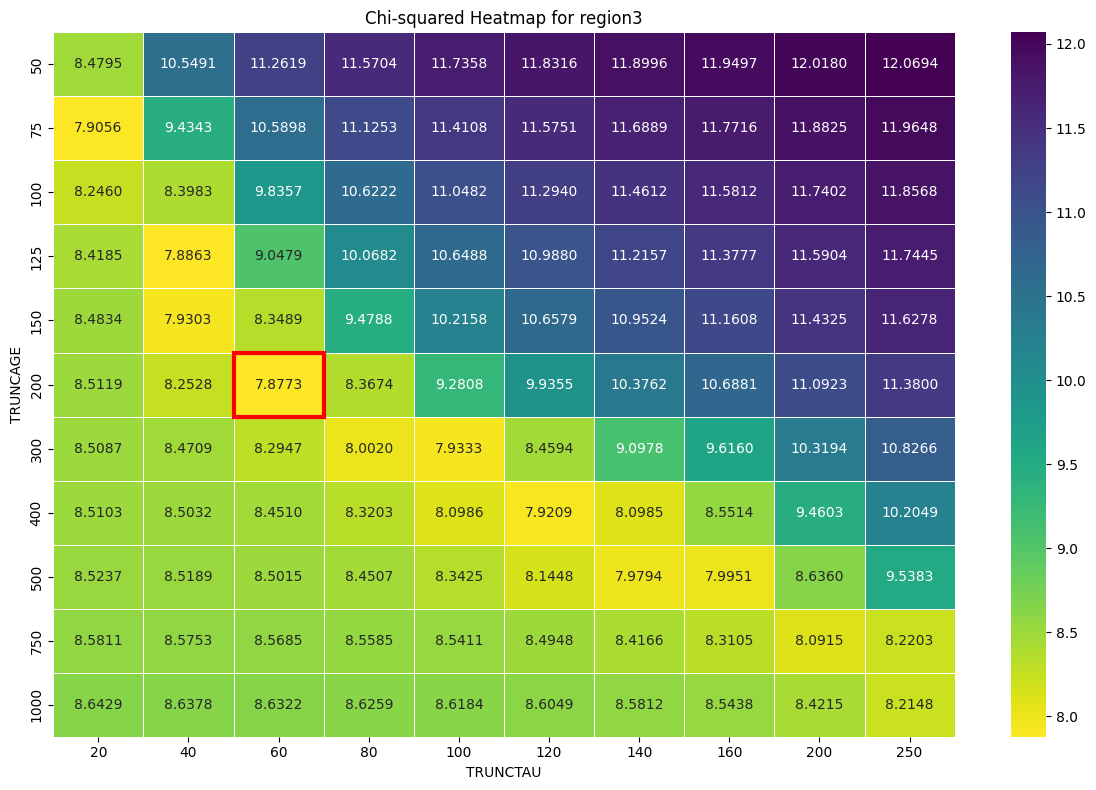

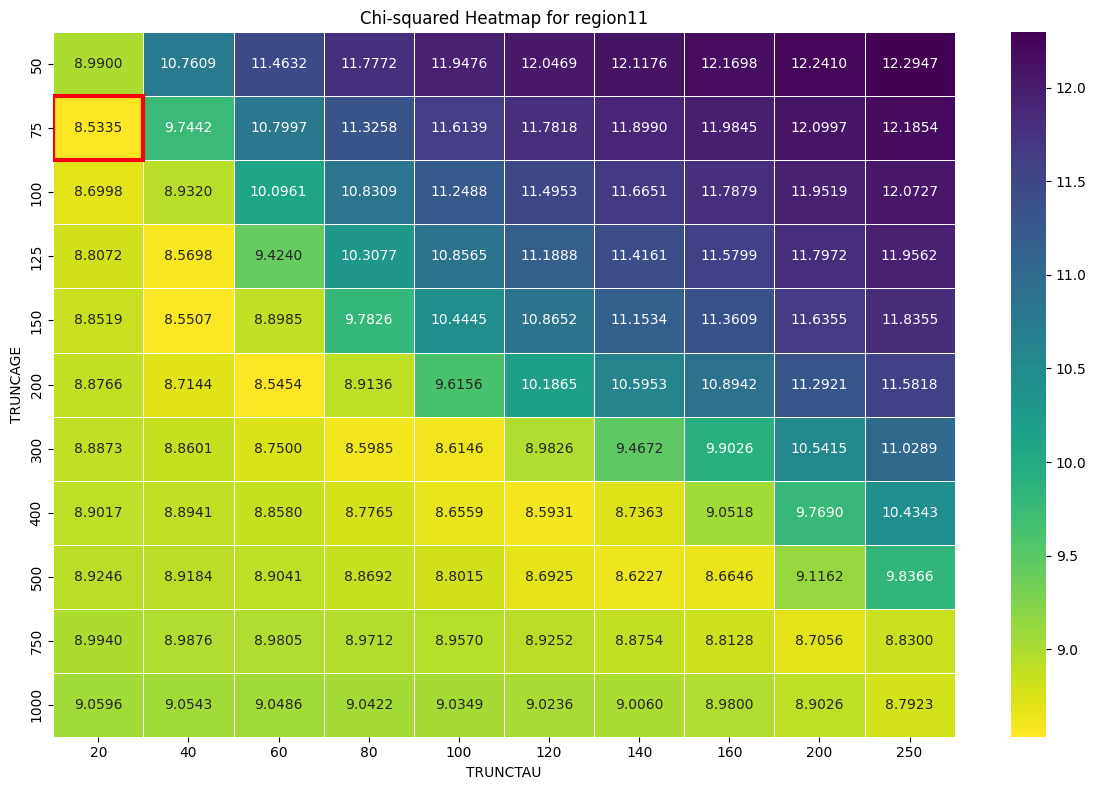

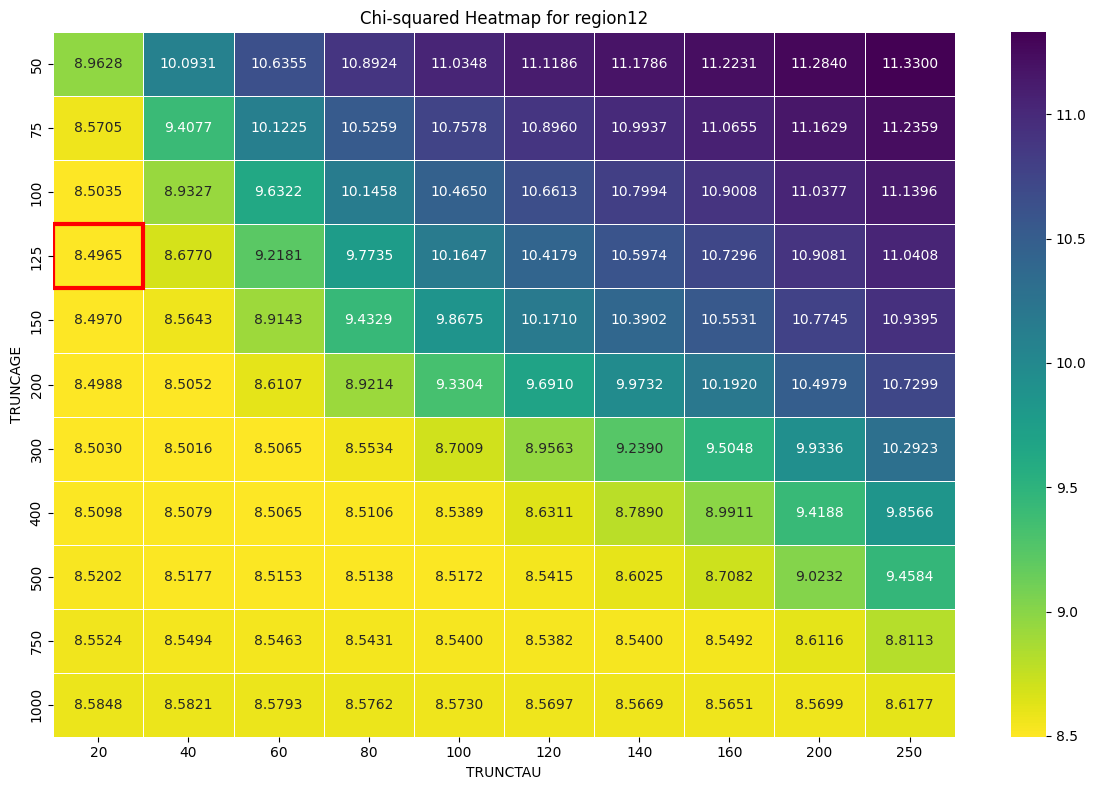

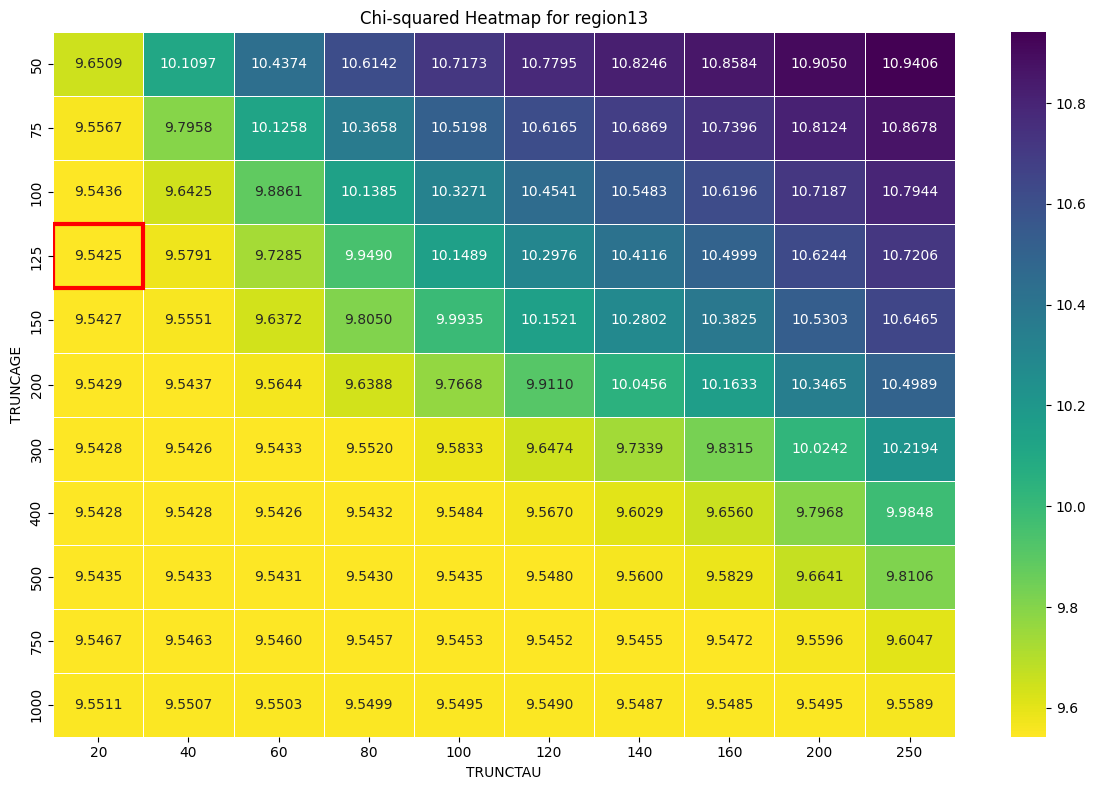

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

for region, data in all_regions_chi2_results.items():
    df_chi2_results = data['df_chi2_results']

    # Pivot the DataFrame to get Chi-squared values as a matrix
    # Qtau will be on the x-axis, Qage on the y-axis, and chi2 as values
    heatmap_data = df_chi2_results.pivot(index='Qage', columns='Qtau', values='chi2')

    # Find the minimum chi2 value and its corresponding Qtau and Qage
    # Note: df_chi2_results['chi2'] already contains log(chi2_value), so idxmin() finds min log(chi2)
    min_chi2_row = df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]
    min_Qtau = min_chi2_row['Qtau']
    min_Qage = min_chi2_row['Qage']
    min_chi2_value_log = min_chi2_row['chi2'] # This is the log(chi2) value
    min_chi2_value_original = np.exp(min_chi2_value_log) # Convert back to original chi2 for display if needed

    # Create the heatmap with 'viridis_r' colormap and float annotations
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, cmap='viridis_r', annot=True, fmt='.4f', linewidths=.5)
    plt.title(f'Chi-squared Heatmap for {region}')
    plt.xlabel('TRUNCTAU')
    plt.ylabel('TRUNCAGE')

    # Highlight the cell with the minimum chi2 value
    # Get the position of the minimum value in the heatmap grid
    min_row_idx = heatmap_data.index.get_loc(min_Qage)
    min_col_idx = heatmap_data.columns.get_loc(min_Qtau)

    # Add a red rectangle patch around the cell
    ax.add_patch(Rectangle((min_col_idx, min_row_idx), 1, 1, fill=False, edgecolor='red', lw=3))

    plt.tight_layout()
    plt.show()

In [10]:

file_path3 = '/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Phot_N4330.fits'
#open the file
qsolist=fits.open(file_path3)

print("Available HDUs:")
for i, hdu in enumerate(qsolist):
    print(f"HDU {i}: {hdu.name} ({hdu.__class__.__name__})")

# Let's inspect the first data HDU (assuming it's at index 1 for typical FITS files)
if len(qsolist) > 1 and isinstance(qsolist[1], fits.BinTableHDU):
    print("\n--- Header of the first data HDU (HDU 1) ---")
    print(repr(qsolist[1].header))
    print("\n--- Column names in the first data HDU (HDU 1) ---")
    if qsolist[1].columns:
        print(qsolist[1].columns.names)
    else:
        print("No columns found in this HDU.")
elif len(qsolist) > 0:
    print("\n--- Header of the primary HDU (HDU 0) ---")
    print(repr(qsolist[0].header))
    print("\n--- No data columns to display for the primary HDU or non-BinTableHDU ---")
else:
    print("\nNo HDUs found in the FITS file.")

qsolist.close()
############################################################


Available HDUs:
HDU 0: PRIMARY (PrimaryHDU)
HDU 1: /Users/matteo/Data/VESTIGE/V1499/SPS/photometry_SN150.fits#1 (BinTableHDU)

--- Header of the first data HDU (HDU 1) ---
XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  168 / width of table in bytes                        
NAXIS2  =                    6 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   21 / number of columns                              
EXTNAME = '/Users/matteo/Data/VESTIGE/V1499/SPS/photometry_SN150.fits#1' / table
TTYPE1  = 'id      '           / label for column 1                             
TFORM1  = 'K      

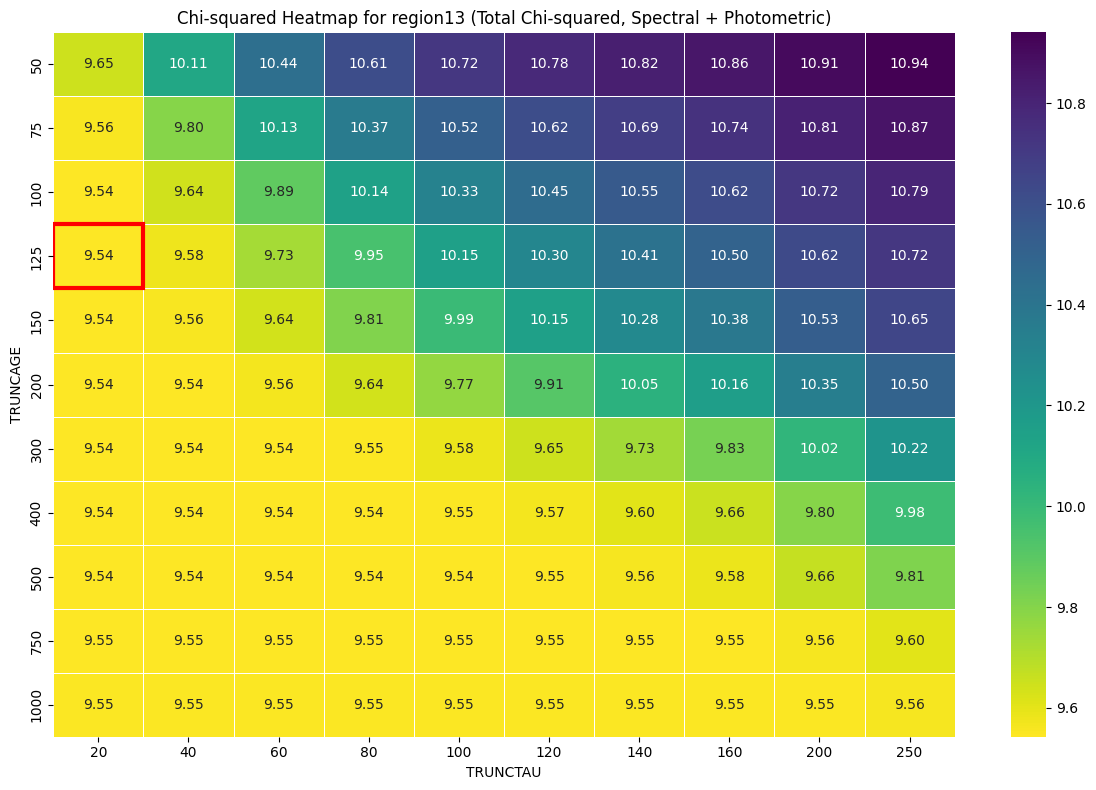

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Assuming 'all_regions_chi2_results' is populated from the previous run
# Let's pick the last processed region for this single heatmap demonstration
# You can change 'region13' to any other region like 'region1', 'region2', etc., if you want to see a specific one.
current_region_data = all_regions_chi2_results['region13']
df_chi2_results = current_region_data['df_chi2_results']
region_name = 'region13'

# Pivot the DataFrame to get Chi-squared values as a matrix
# Qtau will be on the x-axis, Qage on the y-axis, and chi2 as values
heatmap_data = df_chi2_results.pivot(index='Qage', columns='Qtau', values='chi2')

# Find the minimum chi2 value and its corresponding Qtau and Qage
# Note: df_chi2_results['chi2'] contains log(total_chi2), so idxmin() finds min log(chi2)
min_chi2_row = df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]
min_Qtau = min_chi2_row['Qtau']
min_Qage = min_chi2_row['Qage']
min_chi2_value_log = min_chi2_row['chi2'] # This is the log(total_chi2) value
min_chi2_value_original = np.exp(min_chi2_value_log) # Convert back to original chi2 for display if needed

# Create the heatmap with 'viridis_r' colormap and float annotations
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, cmap='viridis_r', annot=True, fmt='.2f', linewidths=.5)
plt.title(f'Chi-squared Heatmap for {region_name} (Total Chi-squared, Spectral + Photometric)')
plt.xlabel('TRUNCTAU')
plt.ylabel('TRUNCAGE')

# Highlight the cell with the minimum chi2 value
# Get the position of the minimum value in the heatmap grid
min_row_idx = heatmap_data.index.get_loc(min_Qage)
min_col_idx = heatmap_data.columns.get_loc(min_Qtau)

# Add a red rectangle patch around the cell
ax.add_patch(Rectangle((min_col_idx, min_row_idx), 1, 1, fill=False, edgecolor='red', lw=3))

plt.tight_layout()
plt.show()

In [12]:
file_path3 = '/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Phot_N4330.fits'
#open the file
#qsolist=fits.open(file_path3)
with fits.open(file_path3) as hdul:
    # Assuming the data is in the second HDU (index 1), which is a BinTableHDU as identified before
    data = hdul[1].data

    # Create an empty dictionary to hold column data in native byte order
    df_dict = {}
    for col_name in data.names:
        # Convert column data to native byte order using astype on the dtype
        # This handles both the deprecation of newbyteorder() and ensures correct byte order for pandas.
        df_dict[col_name] = data[col_name].astype(data[col_name].dtype.newbyteorder('='))

    # Convert the dictionary to a pandas DataFrame
    df = pd.DataFrame(df_dict)

# Display the first few rows and column names to confirm data loading
print("DataFrame head:")
display(df.head())
print("\nDataFrame columns:")
display(df.columns)



DataFrame head:


,id,z_best,dl,f_FUV,e_FUV,f_NUV,e_NUV,f_U,e_U,f_G,...,f_I,e_I,f_Z,e_Z,f_IRAC1,e_IRAC1,f_IRAC4,e_IRAC4,f_PACS100,e_PACS100
0,1,0.004671,16.5,0.0700,0.0025,0.111,0.005,0.513,0.035,1.203,...,2.19100,0.11700,2.52800,0.1810,1.329,0.110,0.341,0.197,0.1,23.55
1,2,0.004671,16.5,0.1070,0.0050,0.171,0.008,0.686,0.045,1.539,...,2.59100,0.09000,3.02700,0.1100,1.477,0.049,0.598,0.080,0.1,12.19
2,3,0.004671,16.5,0.1229,0.0060,0.188,0.009,0.845,0.055,1.960,...,3.56700,0.11000,4.28700,0.1480,2.452,0.052,3.079,0.085,59.4,12.41
3,11,0.004671,16.5,0.1450,0.0700,0.219,0.010,0.848,0.050,1.863,...,3.27477,0.11277,3.73129,0.1310,2.068,0.052,3.326,0.084,58.3,12.34
4,12,0.004671,16.5,0.0200,0.0018,0.057,0.003,0.374,0.025,0.929,...,1.71310,0.06000,1.93600,0.0814,0.942,0.050,0.298,0.080,0.0,12.61



DataFrame columns:


Index(['id', 'z_best', 'dl', 'f_FUV', 'e_FUV', 'f_NUV', 'e_NUV', 'f_U', 'e_U',
       'f_G', 'e_G', 'f_I', 'e_I', 'f_Z', 'e_Z', 'f_IRAC1', 'e_IRAC1',
       'f_IRAC4', 'e_IRAC4', 'f_PACS100', 'e_PACS100'],
      dtype='object')

In [13]:
from astropy.io import fits
import numpy as np
import pandas as pd
import scipy.stats

# Re-define the goodness_of_fit function without print statements for suppressed output
def goodness_of_fit(data_observed, data_model, data_error=None, statistic='chi2'):
    if len(data_observed) != len(data_model):
        raise ValueError("Observed and model data must have the same length.")

    if statistic == 'chi2':
        if data_error is None:
            raise ValueError("Error data (data_error) is required for 'chi2' statistic.")
        if len(data_observed) != len(data_error):
            raise ValueError("Observed data and error data must have the same length.")

        non_zero_errors_mask = data_error != 0
        if not np.any(non_zero_errors_mask):
            # print("Warning: All error values are zero. Chi-squared test cannot be performed meaningfully.")
            return np.nan # Return NaN if all errors are zero

        filtered_observed = data_observed[non_zero_errors_mask]
        filtered_model = data_model[non_zero_errors_mask]
        filtered_error = data_error[non_zero_errors_mask]

        # Handle potential zero errors after filtering if any still exist
        # For robustness, we can replace zero errors with a very small number
        # or filter them out completely if they lead to inf chi2 contributions
        filtered_error[filtered_error == 0] = np.finfo(float).eps # Replace zero with a small epsilon

        chi2 = np.sum(((filtered_observed - filtered_model) / filtered_error)**2)
        return chi2
    else:
        raise ValueError(f"Unsupported statistic: {statistic}")

# --- Demonstration for a single region and model ---

# Let's pick a specific region for demonstration, e.g., 'region2'
demo_region_id_in_df = 2 # Assuming 'id' in df corresponds to region number
models_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits'
spec_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits'

# Load observed spectrum data
with fits.open(spec_file_path) as spec_hdu:
    specflx = spec_hdu[0].data
    specerr = spec_hdu[1].data
    # specwav = spec_hdu[2].data # Not needed for chi2 calculation

# Load models and select an arbitrary model for demonstration, e.g., the first model (ext_idx = 1)
with fits.open(models_file_path) as modhdu:
    # Use a specific model, e.g., the one that previously was identified as 'best_fit_index' for region2, which was 3
    demo_model_ext_idx = 3
    demo_model = modhdu[demo_model_ext_idx]
    demo_model_header = demo_model.header
    demo_model_spec = demo_model.data[0]

    # Extract predicted photometric fluxes from model header
    # Corresponding columns in Phot_N4330.fits: f_FUV, e_FUV, f_NUV, e_NUV, f_U, e_U, f_G, e_G, f_I, e_I, f_Z, e_Z, f_IRAC1, e_IRAC1, f_IRAC4, e_IRAC4
    # Corresponding model header keys: MODFUV, MODNUV, MODU, MODG, MODI, MODZ, MODIR1, MODIR4
    model_phot_bands = ['MODFUV', 'MODNUV', 'MODU', 'MODG', 'MODI', 'MODZ', 'MODIR1', 'MODIR4']
    model_phot_fluxes = np.array([demo_model_header[band] for band in model_phot_bands])

# --- Spectral Chi-squared calculation ---
spectral_chi2 = goodness_of_fit(specflx, demo_model_spec * 10**20, data_error=specerr, statistic='chi2')
print(f"Spectral Chi-squared for model {demo_model_ext_idx} of region2: {spectral_chi2:.4f}")

# --- Photometric Chi-squared calculation ---

# Get observed photometry for the demo_region_id_in_df
observed_phot_row = df[df['id'] == demo_region_id_in_df].iloc[0]

# Define the observed photometric bands and their corresponding error bands
obs_phot_bands_flux = ['f_FUV', 'f_NUV', 'f_U', 'f_G', 'f_I', 'f_Z', 'f_IRAC1', 'f_IRAC4']
obs_phot_bands_error = ['e_FUV', 'e_NUV', 'e_U', 'e_G', 'e_I', 'e_Z', 'e_IRAC1', 'e_IRAC4']

observed_phot_fluxes = np.array([observed_phot_row[band] for band in obs_phot_bands_flux])
observed_phot_errors = np.array([observed_phot_row[band] for band in obs_phot_bands_error])

# Calculate photometric Chi-squared
# Note: Photometric fluxes from models are already in the same units as observed (assuming consistency)
photometric_chi2 = goodness_of_fit(observed_phot_fluxes, model_phot_fluxes, data_error=observed_phot_errors, statistic='chi2')
print(f"Photometric Chi-squared for model {demo_model_ext_idx} of region2: {photometric_chi2:.4f}")

# --- Combined Total Chi-squared ---
total_chi2 = spectral_chi2 + photometric_chi2
print(f"Total (Spectral + Photometric) Chi-squared for model {demo_model_ext_idx} of region2: {total_chi2:.4f}")

# Optionally, you can also store this total_chi2 in your df_chi2_results if you re-run the loop with this logic.


Spectral Chi-squared for model 3 of region2: 2312.0491
Photometric Chi-squared for model 3 of region2: 40.3119
Total (Spectral + Photometric) Chi-squared for model 3 of region2: 2352.3610


In [14]:
from astropy.io import fits
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Import numpy for float64
import scipy.stats

# Define the goodness_of_fit function here as it's a utility for the task
def goodness_of_fit(data_observed, data_model, data_error=None, statistic='chi2'):
    """Calculates goodness of fit using specified statistic.

    Args:
        data_observed (np.ndarray): The observed data.
        data_model (np.ndarray): The model data.
        data_error (np.ndarray, optional): The errors associated with observed data.
                                          Required for 'chi2' statistic. Defaults to None.
        statistic (str, optional): The statistical test to use. Can be 'chi2' or 'ad'.
                                   Defaults to 'chi2'.

    Returns:
        float or tuple: The goodness of fit statistic(s).

    Raises:
        ValueError: If an unsupported statistic is requested or required data is missing.
    """
    if len(data_observed) != len(data_model):
        raise ValueError("Observed and model data must have the same length.")

    if statistic == 'chi2':
        if data_error is None:
            raise ValueError("Error data (data_error) is required for 'chi2' statistic.")
        if len(data_observed) != len(data_error):
            raise ValueError("Observed data and error data must have the same length.")

        non_zero_errors_mask = data_error != 0
        if not np.any(non_zero_errors_mask):
            # print("Warning: All error values are zero. Chi-squared test cannot be performed meaningfully.") # Suppressed verbose output
            return np.nan

        filtered_observed = data_observed[non_zero_errors_mask]
        filtered_model = data_model[non_zero_errors_mask]
        filtered_error = data_error[non_zero_errors_mask]

        # Handle potential zero errors after filtering if any still exist
        # For robustness, we can replace zero errors with a very small number
        filtered_error[filtered_error == 0] = np.finfo(float).eps

        chi2 = np.sum(((filtered_observed - filtered_model) / filtered_error)**2)
        # degrees_of_freedom = len(filtered_observed) - 1 # Suppressed verbose output
        return chi2

    elif statistic == 'ad':
        result = scipy.stats.anderson_ksamp([data_observed, data_model])
        return result
    else:
        raise ValueError(f"Unsupported statistic: {statistic}")

# Define regions
regions = ['region1', 'region2', 'region3', 'region11', 'region12', 'region13']

# Dictionary to store results for all regions
all_regions_chi2_results = {}

# Define photometric bands and their error counterparts from the df DataFrame
obs_phot_bands_flux = ['f_FUV', 'f_NUV', 'f_U', 'f_G', 'f_I', 'f_Z', 'f_IRAC1', 'f_IRAC4']
obs_phot_bands_error = ['e_FUV', 'e_NUV', 'e_U', 'e_G', 'e_I', 'e_Z', 'e_IRAC1', 'e_IRAC4']
model_phot_bands = ['MODFUV', 'MODNUV', 'MODU', 'MODG', 'MODI', 'MODZ', 'MODIR1', 'MODIR4']

for region in regions:
    spec_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_{region}.fits'
    models_file_path = f'/content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_{region}.fits'
    print(f'\nProcessing region: {region}')
    print(f'  Spectrum file path: {spec_file_path}')
    print(f'  Models file path: {models_file_path}')

    try:
        # 1. Open the spectrum FITS file and extract data
        with fits.open(spec_file_path) as spec_hdu:
            specflx = spec_hdu[0].data
            specerr = spec_hdu[1].data
            specwav = spec_hdu[2].data

        # Extract numerical id from region string to match with df
        region_id_str = region.replace('region', '')
        region_id = int(region_id_str) if region_id_str.isdigit() else int(region_id_str.replace('1', '')) if region_id_str.startswith('1') else -1 # Handles region1, region11, etc. in df

        if region_id == -1:
          print(f"Warning: Could not determine numerical ID for region {region}. Skipping photometric chi-squared for this region.")
          # Skip photometric part if ID cannot be determined
          observed_phot_fluxes = np.array([])
          observed_phot_errors = np.array([])
        else:
            # Get observed photometry for the current region
            # Assuming 'id' column in df matches the numerical part of the region name
            observed_phot_row = df[df['id'] == region_id].iloc[0]
            observed_phot_fluxes = np.array([observed_phot_row[band] for band in obs_phot_bands_flux])
            observed_phot_errors = np.array([observed_phot_row[band] for band in obs_phot_bands_error])


        # 2. Open the models FITS file and determine Next
        with fits.open(models_file_path) as modhdu:
            Next = modhdu[0].header['NEXT']

            # 3. Initialize list and best-fit tracking for the current region
            chi2_results_list = []
            min_total_chi2 = np.inf
            best_fit_index = -1
            best_fit_model_data = None

            # 5. Loop through model extensions
            for ext_idx in np.arange(1, Next + 1):
                thisext = modhdu[ext_idx]
                thishead = thisext.header
                modspec = thisext.data[0]
                Qtau = thishead['TRUNCTAU']
                Qage = thishead['TRUNCAGE']

                # a. Calculate spectral Chi-squared value
                spectral_chi2 = goodness_of_fit(specflx, modspec * 10**20, data_error=specerr, statistic='chi2')

                # b. Extract predicted photometric fluxes from model header
                model_phot_fluxes = np.array([thishead[band] for band in model_phot_bands])

                # c. Calculate photometric Chi-squared value
                photometric_chi2 = goodness_of_fit(observed_phot_fluxes, model_phot_fluxes, data_error=observed_phot_errors, statistic='chi2')

                # Ensure neither chi2 is NaN before summing
                if np.isnan(spectral_chi2) or np.isnan(photometric_chi2):
                    total_chi2 = np.nan
                else:
                    total_chi2 = photometric_chi2

                # e. Append results to the list (using natural log for potential heatmap distribution)
                if not np.isnan(total_chi2):
                    chi2_results_list.append({'Qtau': Qtau, 'Qage': Qage, 'chi2': np.log(total_chi2)})

                    # f. Update best-fit model logic
                    if total_chi2 < min_total_chi2:
                        min_total_chi2 = total_chi2
                        best_fit_index = ext_idx
                        best_fit_model_data = modspec

            # Create DataFrame for the current region
            df_chi2_results = pd.DataFrame(chi2_results_list)

            print(f"  Minimum Total Chi-squared value for {region}: {min_total_chi2:.4f}")
            print(f"  Index of best-fit model for {region}: {best_fit_index}")
            if not df_chi2_results.empty:
                best_fit_row = df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]
                print(f"  Best-fit Qtau: {best_fit_row['Qtau']}")
                print(f"  Best-fit Qage: {best_fit_row['Qage']}")
                print(f"  Chi-squared results DataFrame head for {region}:\n{df_chi2_results.head()}")
            else:
                print(f"  No valid Chi-squared results for {region} to determine best fit.")

            # Store the df_chi2_results for the current region
            all_regions_chi2_results[region] = {
                'df_chi2_results': df_chi2_results,
                'min_chi2': min_total_chi2,
                'best_fit_index': best_fit_index,
                'best_fit_model_data': best_fit_model_data, # Store best fit model data for plotting later if needed
                'specwav': specwav,
                'specflx': specflx
            }

    except FileNotFoundError:
        print(f"Error: FITS files not found for {region}. Skipping.")
    except Exception as e:
        print(f"An error occurred while processing {region}: {e}")

print("\nFinished processing all regions. Results stored in 'all_regions_chi2_results' dictionary.")



Processing region: region1
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region1.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region1.fits
  Minimum Total Chi-squared value for region1: 3.4092
  Index of best-fit model for region1: 86
  Best-fit Qtau: 160.0
  Best-fit Qage: 500.0
  Chi-squared results DataFrame head for region1:
   Qtau  Qage      chi2
0    20    50  9.718186
1    20    75  8.483222
2    20   100  7.272852
3    20   125  5.966387
4    20   150  4.487560

Processing region: region2
  Spectrum file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Spec_N4330_region2.fits
  Models file path: /content/drive/MyDrive/Hos/Hos5/Env_Qtime_Task2/Models_N4330_region2.fits
  Minimum Total Chi-squared value for region2: 12.3829
  Index of best-fit model for region2: 16
  Best-fit Qtau: 40.0
  Best-fit Qage: 150.0
  Chi-squared results DataFrame head for region2:
   Qtau  Qage      chi2
0    20    50  7

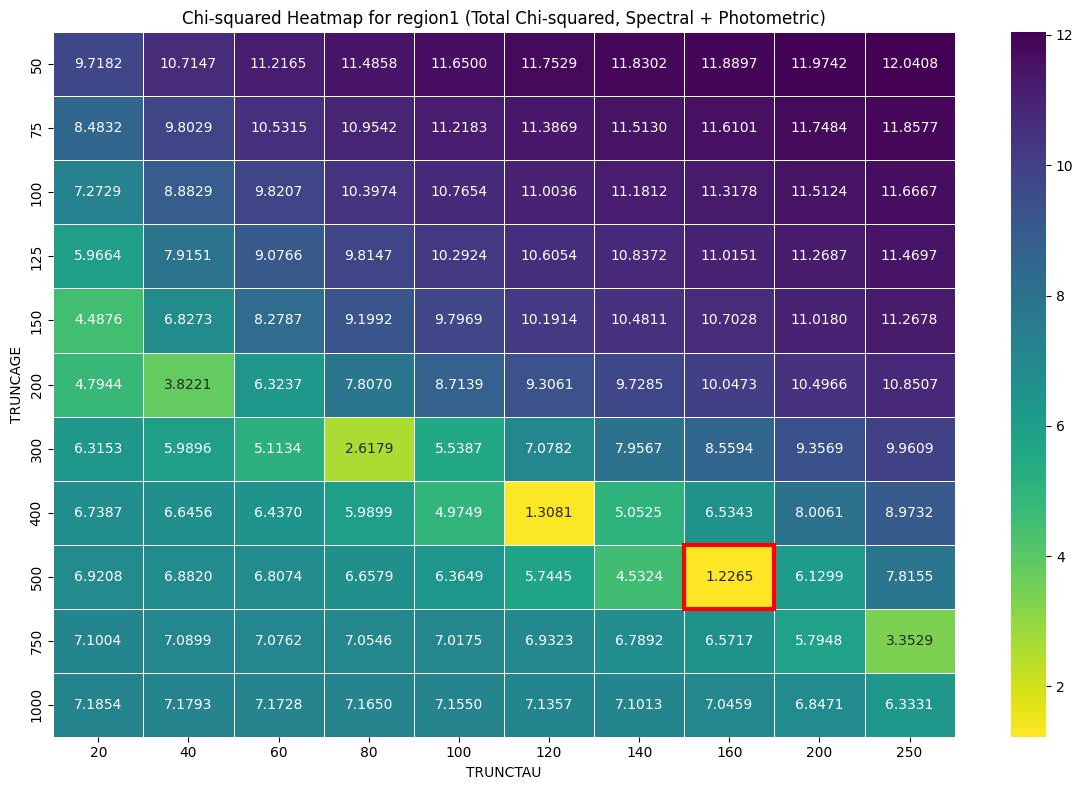

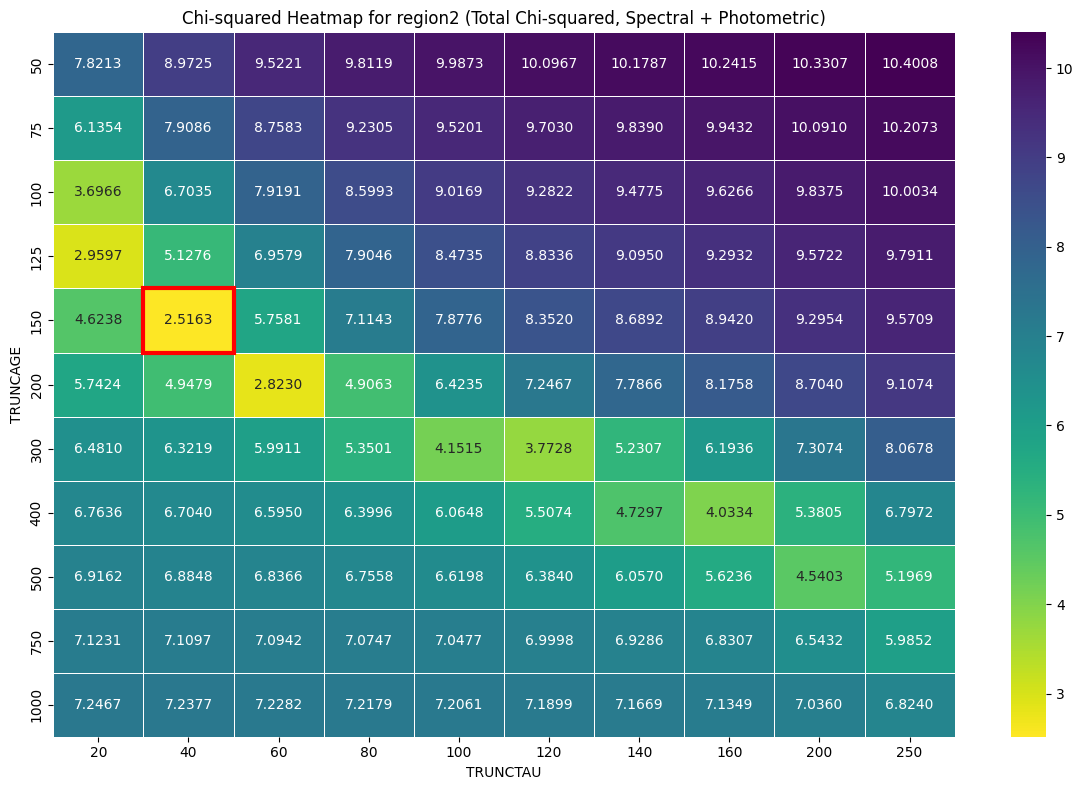

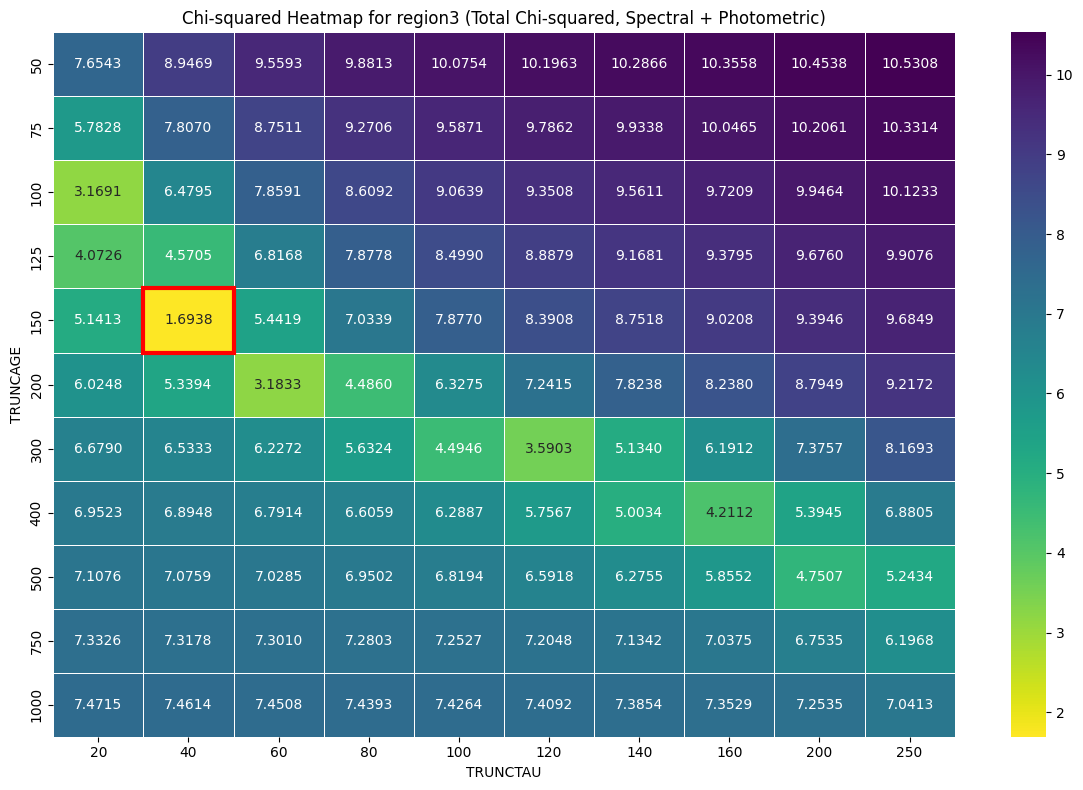

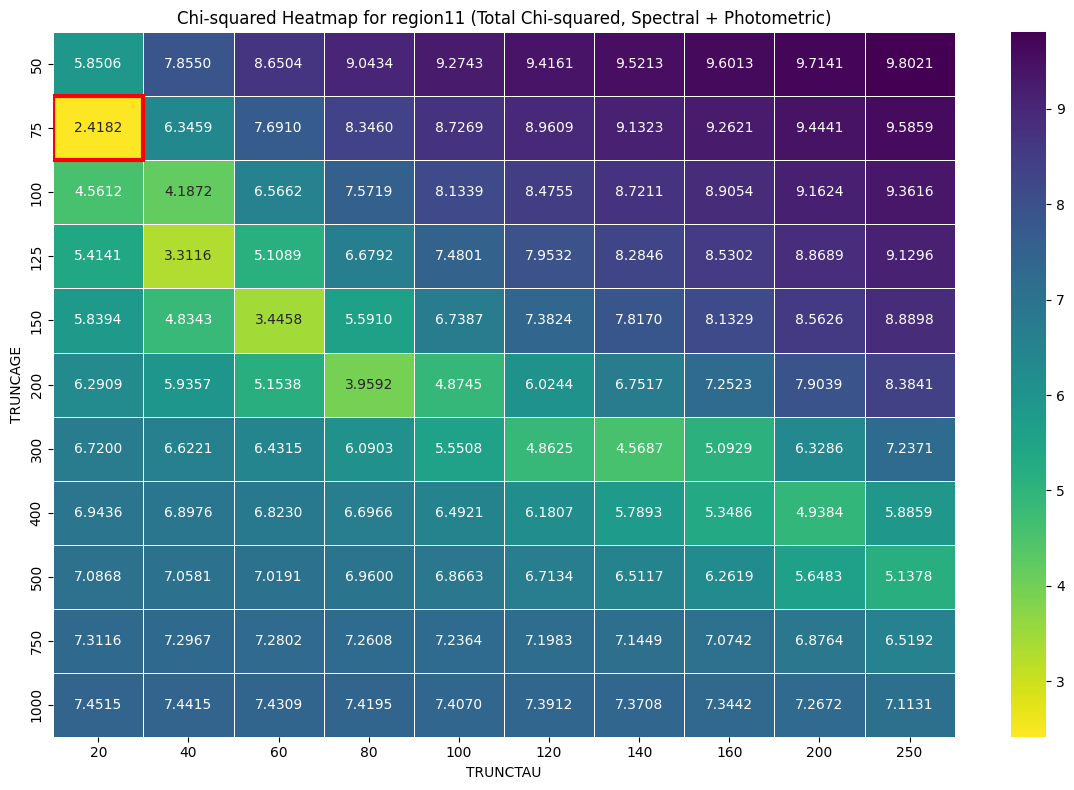

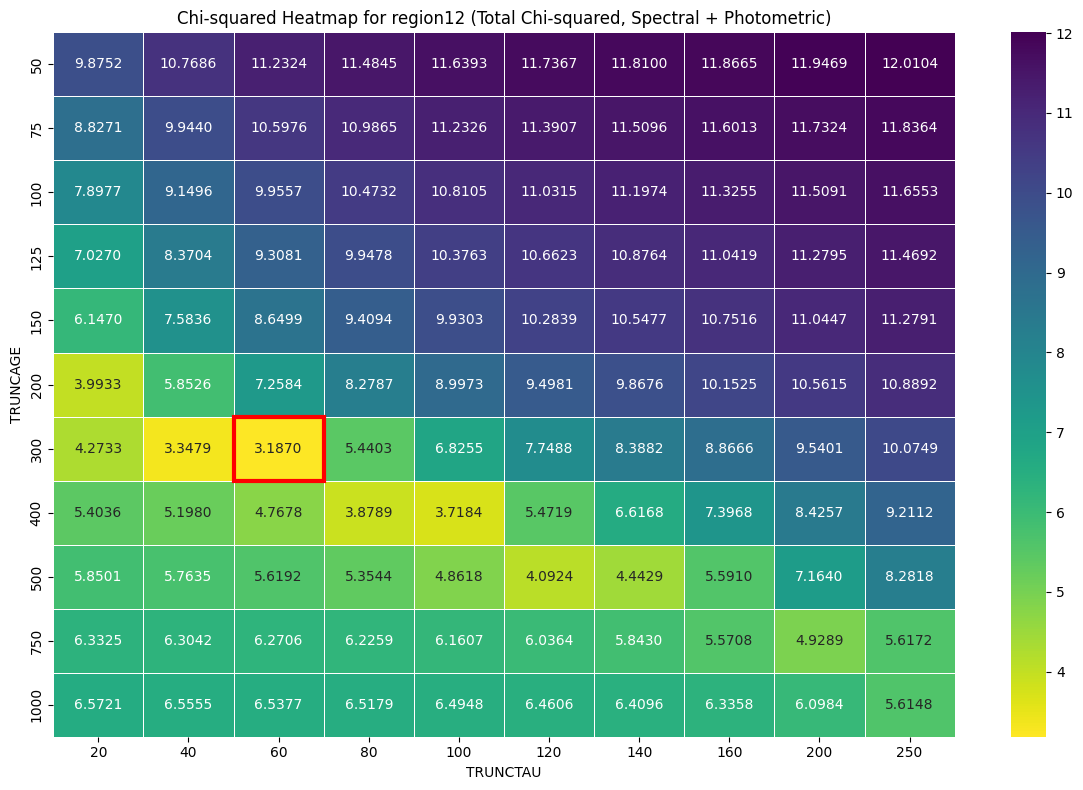

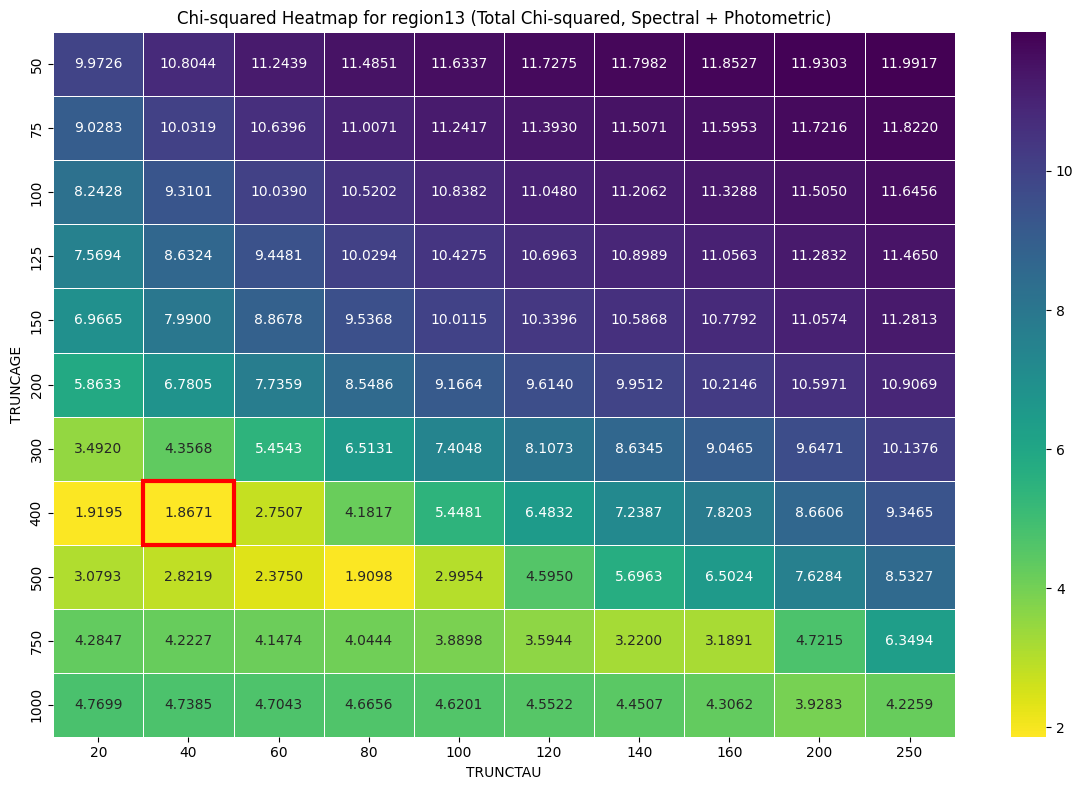

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Loop through each region in the collected results
for region_name, data in all_regions_chi2_results.items():
    df_chi2_results = data['df_chi2_results']

    # Pivot the DataFrame to get Chi-squared values as a matrix
    # Qtau will be on the x-axis, Qage on the y-axis, and chi2 as values
    heatmap_data = df_chi2_results.pivot(index='Qage', columns='Qtau', values='chi2')

    # Find the minimum chi2 value and its corresponding Qtau and Qage
    # Note: df_chi2_results['chi2'] contains log(total_chi2), so idxmin() finds min log(chi2)
    min_chi2_row = df_chi2_results.loc[df_chi2_results['chi2'].idxmin()]
    min_Qtau = min_chi2_row['Qtau']
    min_Qage = min_chi2_row['Qage']
    min_chi2_value_log = min_chi2_row['chi2'] # This is the log(total_chi2) value
    # min_chi2_value_original = np.exp(min_chi2_value_log) # Convert back to original chi2 for display if needed

    # Create the heatmap with 'viridis_r' colormap and float annotations
    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, cmap='viridis_r', annot=True, fmt='.4f', linewidths=.5)
    plt.title(f'Chi-squared Heatmap for {region_name} (Total Chi-squared, Spectral + Photometric)')
    plt.xlabel('TRUNCTAU')
    plt.ylabel('TRUNCAGE')

    # Highlight the cell with the minimum chi2 value
    # Get the position of the minimum value in the heatmap grid
    min_row_idx = heatmap_data.index.get_loc(min_Qage)
    min_col_idx = heatmap_data.columns.get_loc(min_Qtau)

    # Add a red rectangle patch around the cell
    ax.add_patch(Rectangle((min_col_idx, min_row_idx), 1, 1, fill=False, edgecolor='red', lw=3))

    plt.tight_layout()
    plt.show()